In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-data-chicago-2024/real_estate_data_chicago.csv


In [2]:
df= pd.read_csv("/kaggle/input/real-estate-data-chicago-2024/real_estate_data_chicago.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           1940 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


In [4]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


In [5]:
df.describe()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,listPrice
count,1790.000000,1940.00000,1999.00000,1937.000000,592.000000,1282.000000,9.920000e+02,1447.000000,1620.000000,1.415000e+03,1.994000e+03
mean,1946.050838,3.28866,2.43972,2.155911,1.189189,2.131825,7.156209e+03,2069.910159,7.183951,3.685186e+05,6.012279e+05
std,38.985904,1.75855,1.45649,1.106637,0.553119,11.367288,6.861154e+04,1691.518319,13.036822,6.156896e+05,1.202400e+06
min,1856.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000e+00,372.000000,1.000000,6.000000e+02,1.500000e+02
25%,1916.000000,2.00000,2.00000,1.000000,1.000000,1.000000,3.125000e+03,1170.000000,2.000000,1.117500e+05,2.250000e+05
50%,1943.000000,3.00000,2.00000,2.000000,1.000000,2.000000,3.750000e+03,1550.000000,2.000000,2.180000e+05,3.499000e+05
75%,1970.750000,4.00000,3.00000,3.000000,1.000000,2.000000,5.013000e+03,2355.000000,4.000000,3.950000e+05,5.750000e+05
max,2024.000000,21.00000,13.00000,8.000000,5.000000,400.000000,2.156000e+06,25000.000000,119.000000,7.500000e+06,2.350000e+07


In [6]:
df.isnull().sum()

type                0
text                8
year_built        210
beds               60
baths               1
baths_full         63
baths_half       1408
garage            718
lot_sqft         1008
sqft              553
stories           380
lastSoldPrice     585
soldOn            585
listPrice           6
status              0
dtype: int64

# Data cleaning

In [7]:
numerical_cols = df.select_dtypes(exclude="object").columns
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols].nunique()

type         7
text      1981
soldOn    1253
status       2
dtype: int64

In [8]:
df=df.drop('text',axis=1)

## Converting to DateTime Objects and extracting Year,day,month,day information

In [9]:
# Converting to datetime objects
df['soldOn'] = pd.to_datetime(df['soldOn'], errors='coerce')

In [10]:
#Checking if there are null values
df['soldOn'].isnull().sum()

585

### Add col for not sold yet

In [11]:
#Assuming that these houses have not been sold 
df['soldOn'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

<ipython-input-11-d2c0f617a30d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['soldOn'].fillna(pd.Timestamp('1970-01-01'), inplace=True)


In [12]:
# Extracting year, month, day and weekday
df['soldOn_year'] = df['soldOn'].dt.year
df['soldOn_month'] = df['soldOn'].dt.month
df['soldOn_day'] = df['soldOn'].dt.day
df['soldOn_weekday'] = df['soldOn'].dt.weekday

In [13]:
df=df.drop('soldOn',axis=1)

## Converting Categorical data into numerical data

In [14]:
df['status'].value_counts()

status
for_sale          1999
ready_to_build       1
Name: count, dtype: int64

In [15]:
map_dict={'ready_to_build' : 0,
         'for_sale' : 1}
df['status'] = df['status'].map(map_dict)

In [16]:
df['status'].value_counts()

status
1    1999
0       1
Name: count, dtype: int64

In [17]:
le= LabelEncoder()
df['type']= le.fit_transform(df['type'])
df['type'].value_counts()

type
5    931
1    716
4    212
6     78
2     60
3      2
0      1
Name: count, dtype: int64

In [18]:
#Checking if there are any Categorical columns still
df.select_dtypes(include="object").columns

Index([], dtype='object')

## Missing Values

In [19]:
missing_df= df.isnull().sum().to_frame().rename(columns={0:"Num missing values"})
missing_df["Percentage of missing values(%)"]=round((missing_df["Num missing values"]/len( df))*100,2)
missing_df

,Num missing values,Percentage of missing values(%)
type,0,0.00
year_built,210,10.50
beds,60,3.00
baths,1,0.05
baths_full,63,3.15
baths_half,1408,70.40
garage,718,35.90
lot_sqft,1008,50.40
sqft,553,27.65
stories,380,19.00


## Dropping columns with more than 50% data missing

In [20]:
df=df.drop(['baths_half','lot_sqft'],axis=1)

## Imputing Data

In [21]:
# Using Knn
knn= KNNImputer(n_neighbors=3)  # Use 3 neighbors
imputed_data=knn.fit_transform(df)
df = pd.DataFrame(imputed_data,columns=df.columns)


In [22]:
#Checking null counts
df.isnull().sum().to_frame().rename(columns={0:"Num missing values"})

,Num missing values
type,0
year_built,0
beds,0
baths,0
baths_full,0
garage,0
sqft,0
stories,0
lastSoldPrice,0
listPrice,0


In [23]:
df.describe()

,type,year_built,beds,baths,baths_full,garage,sqft,stories,lastSoldPrice,listPrice,status,soldOn_year,soldOn_month,soldOn_day,soldOn_weekday
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,3.406500,1944.666500,3.317333,2.439667,2.144667,2.130833,1991.963500,6.865333,3.137683e+05,6.001534e+05,0.999500,1997.99800,5.055500,11.281500,2.383500
std,1.903173,37.541064,1.746820,1.456128,1.094788,9.580486,1510.326574,12.028036,5.312703e+05,1.200769e+06,0.022361,20.28378,3.793628,10.160456,1.243865
min,0.000000,1856.000000,0.000000,0.000000,1.000000,1.000000,372.000000,1.000000,6.000000e+02,1.500000e+02,0.000000,1970.00000,1.000000,1.000000,0.000000
25%,1.000000,1917.000000,2.000000,2.000000,1.000000,1.333333,1200.000000,2.000000,1.128750e+05,2.250000e+05,1.000000,1970.00000,1.000000,1.000000,1.000000
50%,5.000000,1937.166667,3.000000,2.000000,2.000000,2.000000,1550.666667,2.666667,1.765833e+05,3.498000e+05,1.000000,2004.00000,5.000000,9.000000,3.000000
75%,5.000000,1968.000000,4.000000,3.000000,3.000000,2.000000,2276.083333,4.000000,3.350000e+05,5.750000e+05,1.000000,2017.00000,8.000000,20.000000,3.000000
max,6.000000,2024.000000,21.000000,13.000000,8.000000,400.000000,25000.000000,119.000000,7.500000e+06,2.350000e+07,1.000000,2024.00000,12.000000,31.000000,6.000000


# EDA

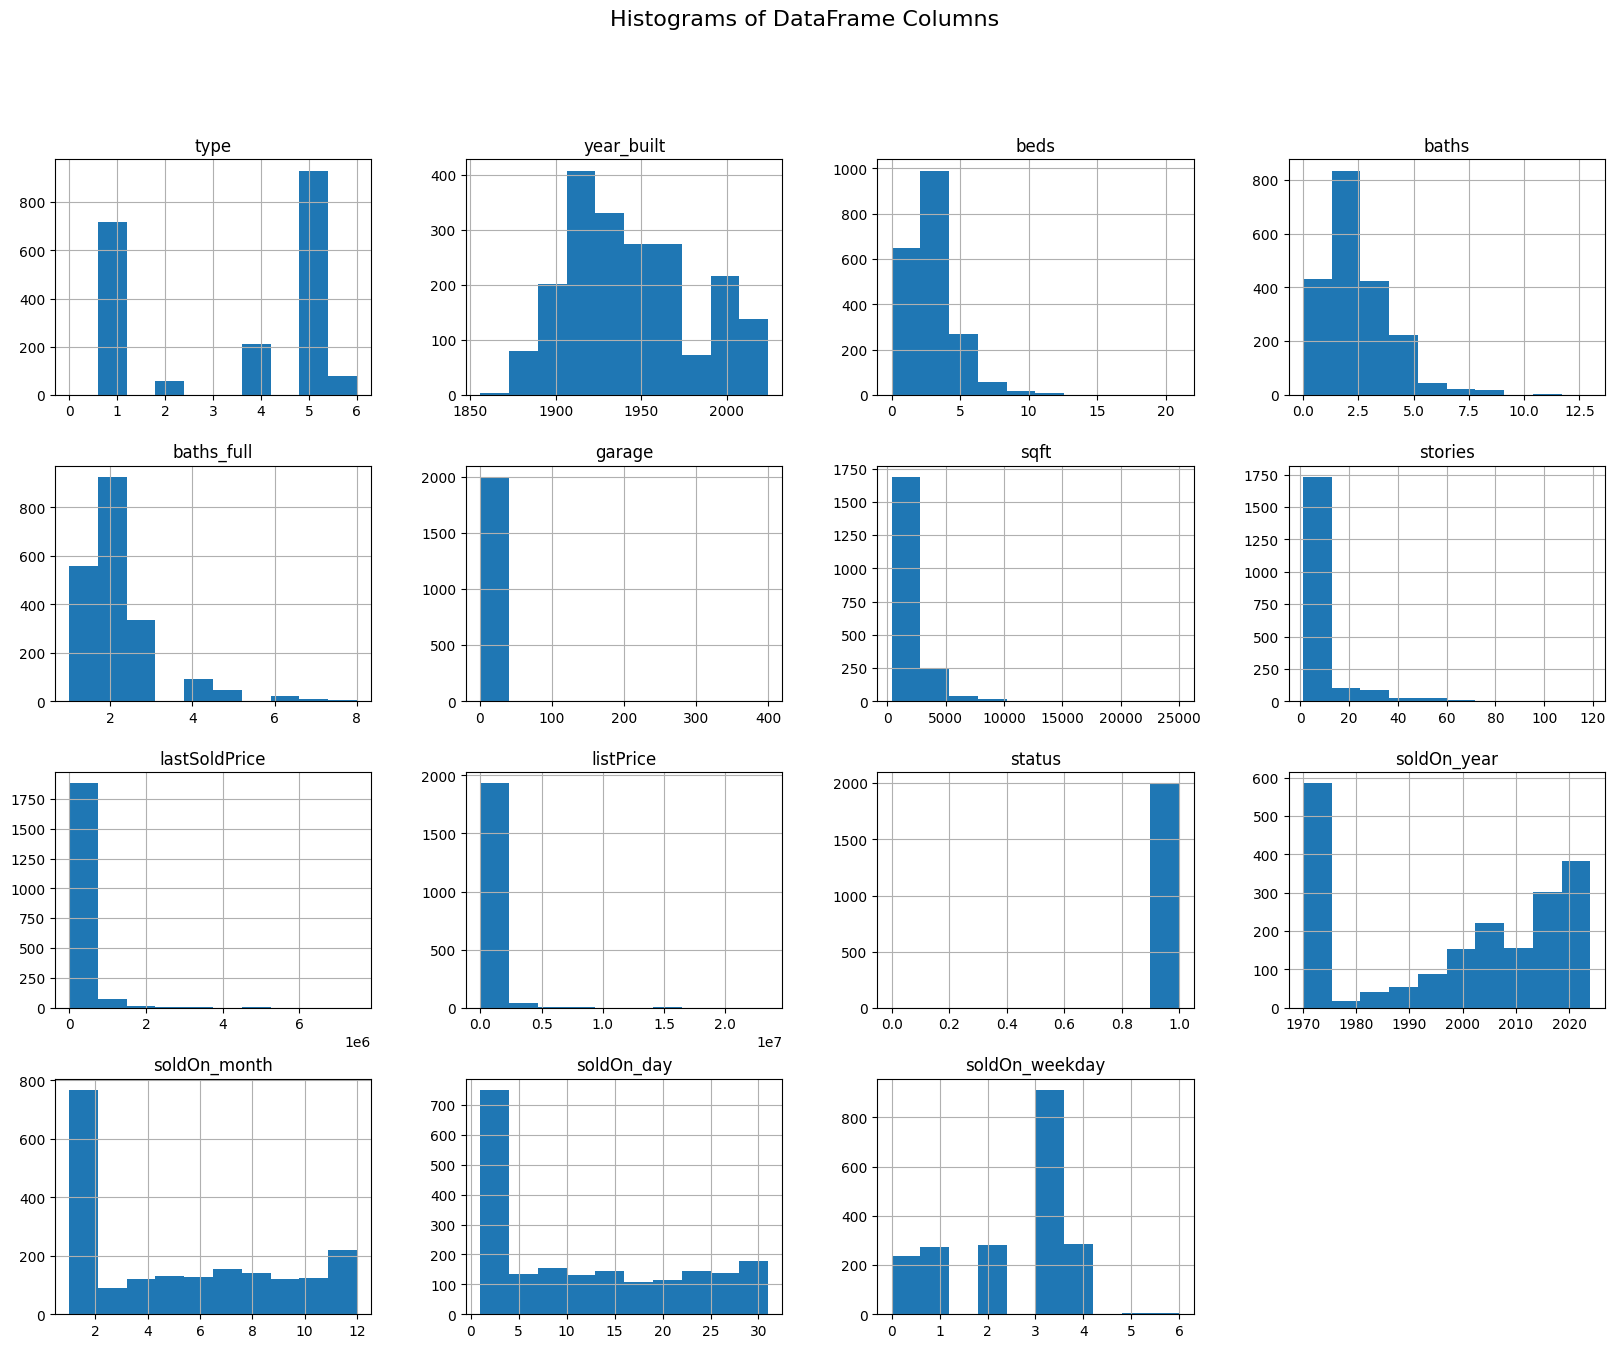

In [24]:
df.hist(figsize=(20, 15))
plt.suptitle('Histograms of DataFrame Columns', fontsize=16)
plt.show()

In [25]:
numerical_cols

Index(['year_built', 'beds', 'baths', 'baths_full', 'baths_half', 'garage',
       'lot_sqft', 'sqft', 'stories', 'lastSoldPrice', 'listPrice'],
      dtype='object')

In [26]:
numerical_cols = numerical_cols.tolist()
numerical_cols.remove('baths_half')
numerical_cols.remove('lot_sqft')

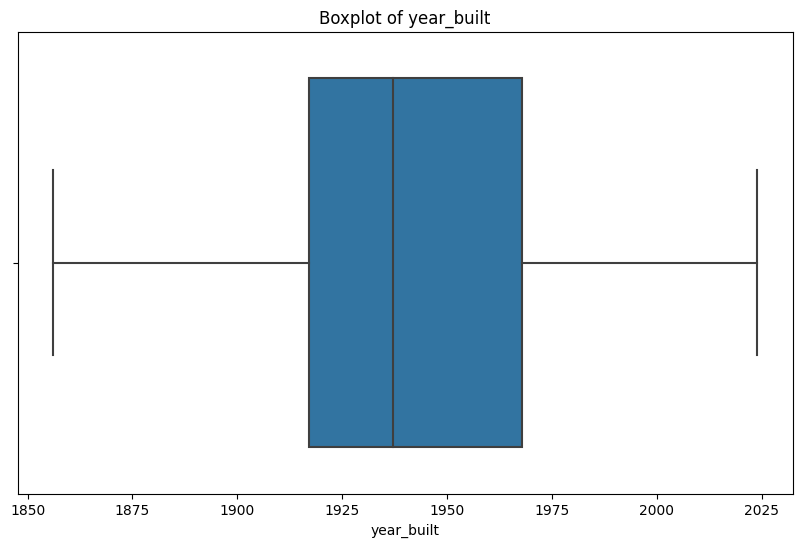

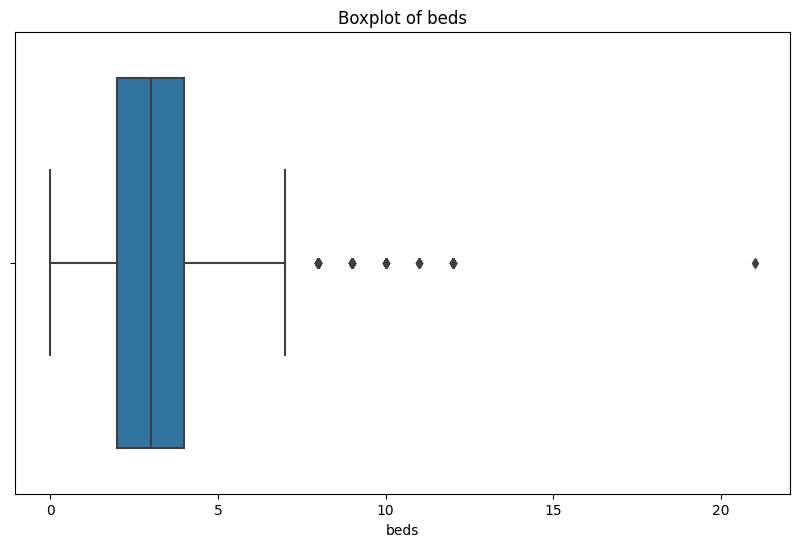

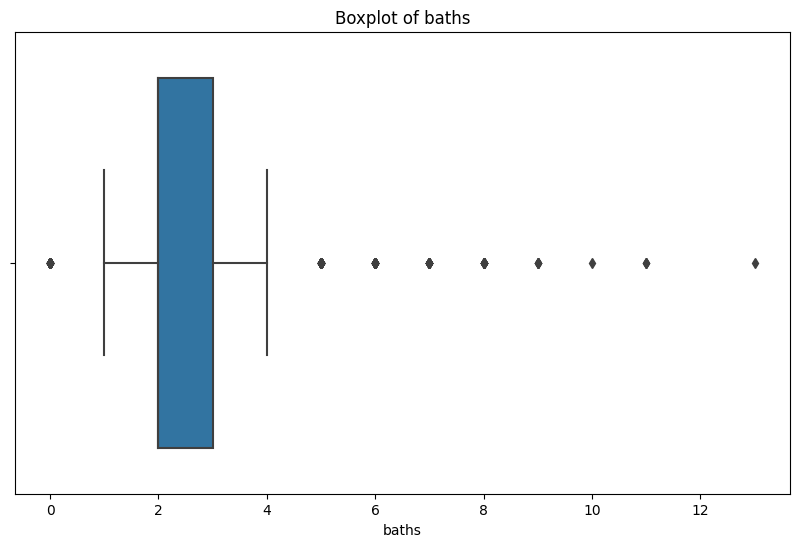

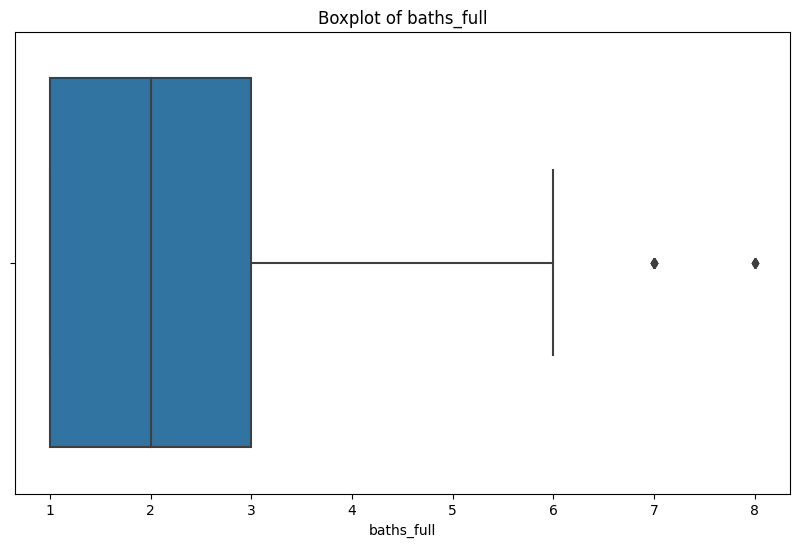

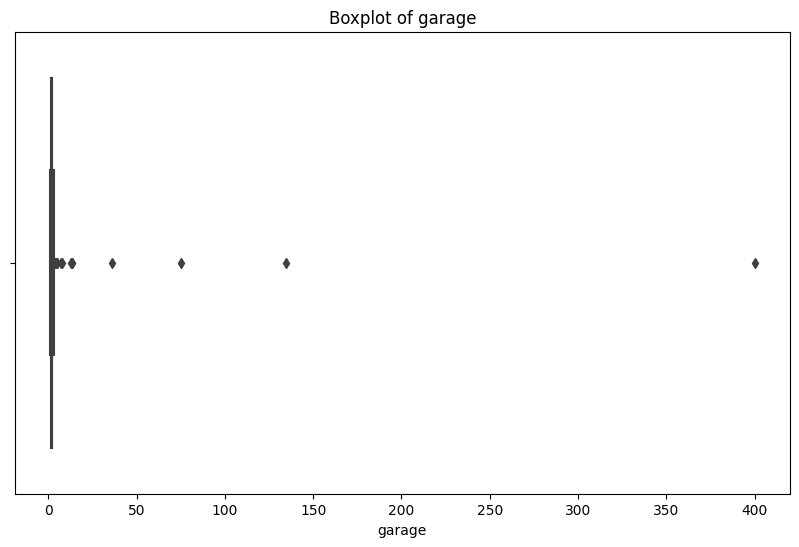

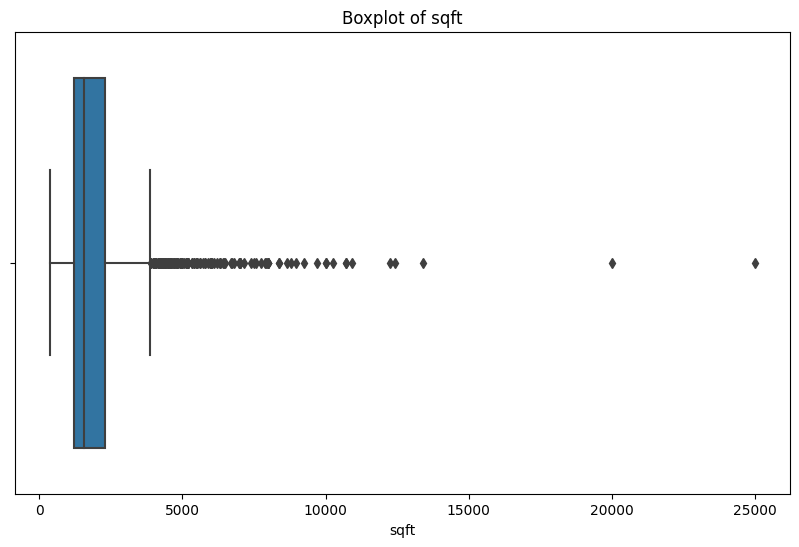

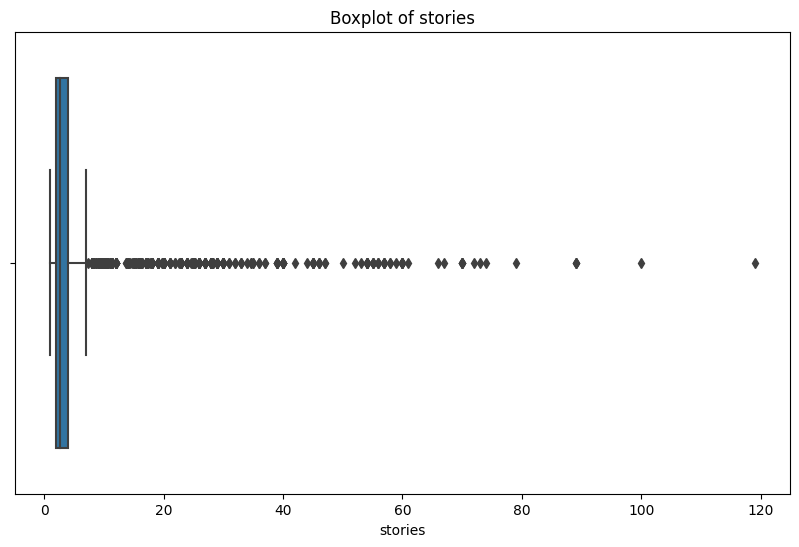

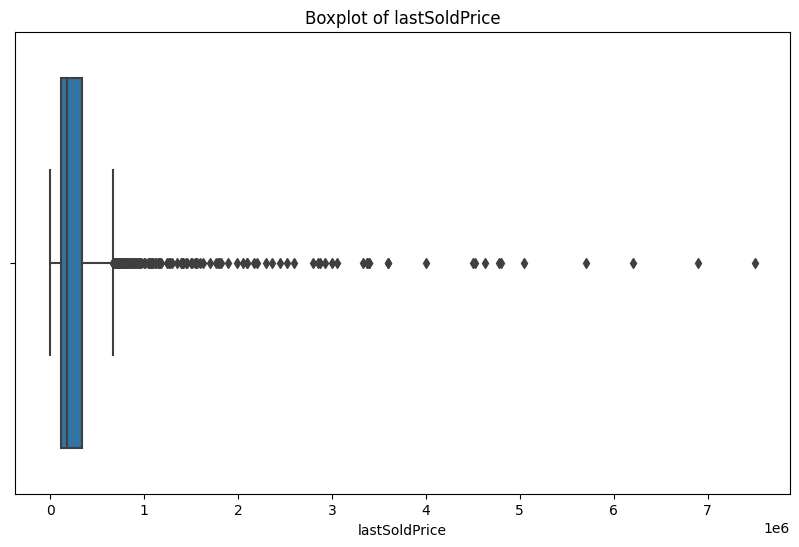

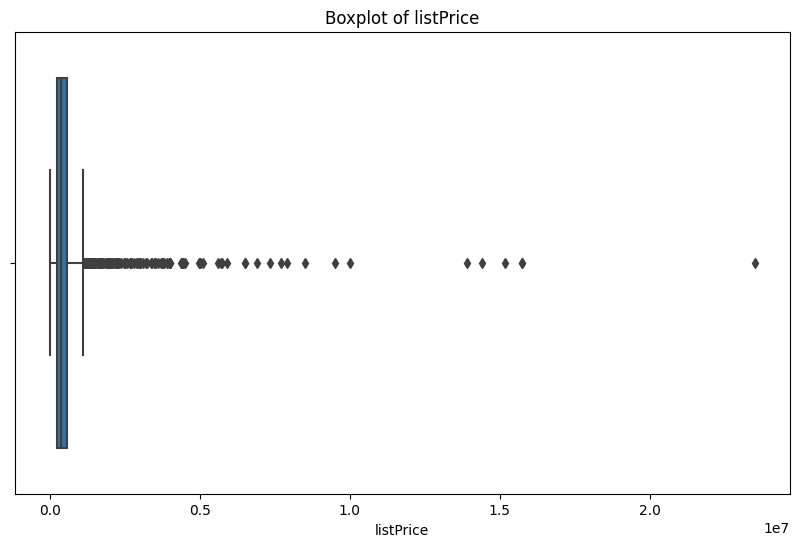

In [27]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Training

## Splitting Dataset into train/test split

In [28]:
y=df['listPrice']
X=df.drop('listPrice',axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 14)
(600, 14)
(1400,)
(600,)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


pipeline_lr= Pipeline([('lr_classifier', LinearRegression())])
pipeline_rf = Pipeline([('rf_classifier', RandomForestRegressor(n_estimators=10,random_state=10))]) 
pipeline_xgb = Pipeline([('xgb_classifier', XGBRegressor())]) 

pipelines = [pipeline_lr, pipeline_rf, pipeline_xgb]
pipe_dict = {0: 'Linear Regression', 1: 'Random Forest Regressor', 2: 'XGBRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i,model in enumerate(pipelines):
    pred_test = model.predict(X_test)
    if i == 1: rf_model = model
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))
    print(pd.DataFrame({'Actual': y_test, 'Predicted': pred_test}))

Linear Regression Test Accuracy:0.5743818522334188
        Actual     Predicted
1860  849900.0  5.962783e+05
353   550000.0  1.039613e+06
1333  475000.0  7.378610e+05
905   749000.0  4.658357e+05
1289   59900.0 -6.613549e+04
...        ...           ...
148   295000.0  5.141420e+05
1554   95999.0  6.698594e+04
1956  725000.0  1.046002e+06
925   189500.0 -5.021444e+05
942   999900.0  1.132316e+06

[600 rows x 2 columns]
Random Forest Regressor Test Accuracy:0.7916631544717253
        Actual  Predicted
1860  849900.0   358400.0
353   550000.0   624350.0
1333  475000.0   317260.0
905   749000.0   621580.0
1289   59900.0   184160.0
...        ...        ...
148   295000.0   297680.0
1554   95999.0   109180.0
1956  725000.0   746680.0
925   189500.0   182070.0
942   999900.0   981790.0

[600 rows x 2 columns]
XGBRegressor Test Accuracy:0.6858105965062264
        Actual      Predicted
1860  849900.0  306135.875000
353   550000.0  549524.500000
1333  475000.0  332626.031250
905   749000.0  65

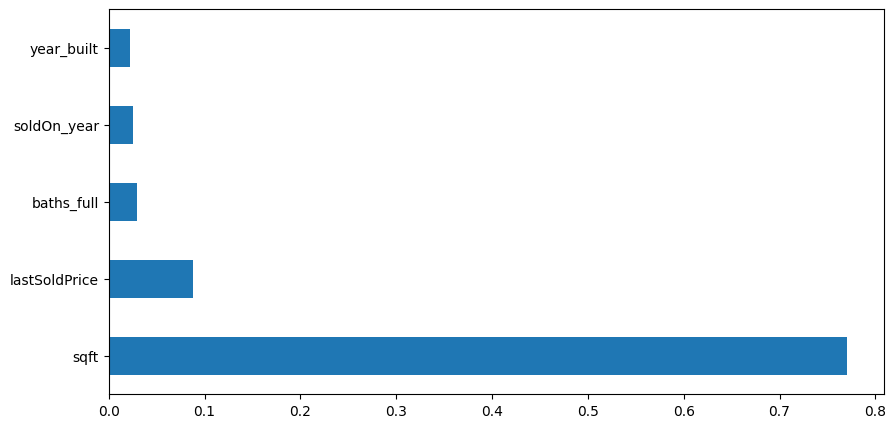

In [31]:
plt.figure(figsize=(10,5))
feat_importances = pd.Series(rf_model['rf_classifier'].feature_importances_, index = X_train.columns)
feat_importances.nlargest(5).plot(kind='barh');